In [1]:
from statsmodels.formula.api import ols
from statsmodels.graphics.api import interaction_plot, abline_plot
from statsmodels.stats.anova import anova_lm

import statsmodels.api as sm

import dataframe_image as dfi

import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
import os

try:
    os.mkdir("../PLOTS/NF_SUBAVG_RACE")
except:
    print("NF_SUBAVG_RACE dir exists.")

    7
swivel = 0

#F ORDER
#swivel_order = [2, 1, 7, 3, 16, 6, 12, 9, 10, 4, 5, 15, 8, 14, 20, 0, 22, 13, 19, 11, 18, 21, 17]
swivel_order = [2, 1, 7, 3, 16, 6, 12, 9, 10, 4, 5, 15, 8, 14, 20, 0, 13, 19, 11, 18, 21, 17]

# NF ORDER
#swivel_order = [22, 2, 6, 1, 3, 0, 4, 8, 7, 15, 5, 14, 16, 9, 12, 18, 20, 17, 13, 10, 19, 21, 11]
#swivel_order = [2, 6, 1, 3, 0, 4, 8, 7, 15, 5, 14, 16, 9, 12, 18, 20, 17, 13, 10, 19, 21, 11]

desired_dir_name = "NF_SUBAVG_RACE"
desired_file_prefix = "NF_R" 

normalize_data=True

by_year = 1
lnconvert=False
 

# FUNCTIONS

In [3]:
def func(x, m, c):
    return (m * x) + c

In [4]:
def color_corr_green(val):
  color = 'green' if val > 0.8 else 'black'
  return 'color: %s' % color

In [5]:
def gen_boxplot():

 case_list = []

 # Create list of data cases
 #
 for index in range(0,len(global_y_soc1)):
    name = global_y_soc1[index][0]
    if (name[5:] not in case_list):
        case_list.append(name[5:])

 print(case_list)

 # Handle one case at a time
 #
 for case in case_list:
        
    #print("case = ",case)
    
    pd_df = pd.DataFrame()
    sel_y = []
    
    for index in range(0,len(global_y_soc1)):
        
        name  = global_y_soc1[index][0]
        sel_y = global_y_soc1[index][1]
        
        # Cycle through years
        #
        if (case in name):    
            #print(case,name)
            name = name[0:5] + name[8:]
            #print("8 ",name)
            
            df = pd.DataFrame()
            df[name] = sel_y
            
            #Q1 = df[name].quantile(0.25)
            #Q3 = df[name].quantile(0.75)
            #IQR = Q3 - Q1    #IQR is interquartile range. 

            #filter = (df[name] >= Q1 - 1.5 * IQR) & (df[name] <= Q3 + 1.5 *IQR)
            #print(filter)
            #df = df.loc[filter]
            
            q = df[name].quantile(0.80)
            df = df[df[name] < q]
            
            pd_df = pd.concat([pd_df,df],axis=1)
        
            #print(pd_df)

    # Get occupation
    for code in soc_new_code:
        #print(code[0][0:2])
        if (code[0][0:2].find(case[0:2]) >= 0):
            #print(code[0],code[1])
            ocup = str(code[0]) + " " + str(code[1])
            
    #print(ocup)

    title = desired_file_prefix + " " + ocup + " boxplot " + str(case[3:])
    plt.figure(title,figsize=(10, 10))
    plt.title(title)

    #plt.ylim(0.0, 3e-6)

    pd_df.boxplot()
    plt.xticks(rotation = 90)
    plt.tight_layout()  

    save_title = "../PLOTS/" + desired_file_output + title + ".png"
    save_title = save_title.replace(",","")
    save_title = save_title.replace(" ","_")
    plt.savefig(save_title, dpi=100, bbox_inches='tight')
    
    plt.show()
    
    #print("HERE")
    #print(df[df['YEAR'].str.contains(name)])
    
    ## ########################## correlations ######################
    
    title = title + "_pearson_corr"

    df_corr = pd_df.corr(method='pearson').style.applymap(color_corr_green)

    df = pd_df.corr(method='pearson')
 
    df_styled = df.style.background_gradient(axis=None, vmin=0.45, vmax=1.0)
  
    save_file = "../PLOTS/" + desired_file_output + title + ".png"
    dfi.export(df_styled, save_file, max_cols=-1, max_rows=-1)

    save_file = "../PLOTS/" + desired_file_output + title + ".xlsx"
    df_corr.to_excel(save_file)

    display(df_styled)        

# ALL CORRELATIONS

In [6]:
# Generate all correlations
#
def gen_corr():

  pd_df = pd.DataFrame()
  sel_y = []
    
  case_list = []

  # Create list of data cases
  #
  for index in range(0,len(global_y_soc1)):
    name = global_y_soc1[index][0]
    if (name[5:] not in case_list):
        case_list.append(name[5:])

  print(case_list)

  # Handle one case at a time
  #
  for case in case_list:
    
    for index in range(0,len(global_y_soc1)):
        
        name  = global_y_soc1[index][0]
        sel_y = global_y_soc1[index][1]
        
        # Cycle through years
        #
        if (case in name):    
            #print(case,name)
            
            temp_pd_df = pd.DataFrame()
            temp_pd_df[name] = sel_y
            pd_df = pd.concat([pd_df,temp_pd_df],axis=1)
        
            #print(pd_df)

            # Get occupation
            for code in soc_new_code:
                #print(code[0][0:2])
                if (code[0][0:2].find(case[0:2]) >= 0):
                    #print(code[0],code[1])
                    ocup = str(code[0]) + " " + str(code[1])
            
  #print(ocup)

  title = desired_file_prefix + ocup +" ALL boxplot " + str(case[3:])
  plt.figure(title,figsize=(10, 10))
  plt.title(title)

  #plt.ylim(0.0, 3e-6)

  pd_df.boxplot()
  plt.xticks(rotation = 90)
  plt.tight_layout()  

  save_title = "../PLOTS/" + desired_file_output + title + ".png"
  save_title = save_title.replace(",","")
  save_title = save_title.replace(" ","_")
  plt.savefig(save_title, dpi=100, bbox_inches='tight')
    
  plt.show()
    
  #print("HERE")
  #print(df[df['YEAR'].str.contains(name)])
    
  ## ########################## correlations ######################
    
  title = title + "_pearson_corr"

  df_corr = pd_df.corr(method='pearson').style.applymap(color_corr_green)

  df = pd_df.corr(method='pearson')
 
  df_styled = df.style.background_gradient(axis=None, vmin=0.45, vmax=1.0)
  
  save_file = "../PLOTS/" + desired_file_output + title + ".png"
  dfi.export(df_styled, save_file, max_cols=-1, max_rows=-1)

  save_file = "../PLOTS/" + desired_file_output + title + ".xlsx"
  df_corr.to_excel(save_file)

  display(df_styled)        



# COLLATE THE DATA

In [7]:
lastfound = ""
pcov      = []


no_genericDB_data_dict = {}


ocovper   = []
ocov      = []
lines     = []

global_y_soc1 = []

for ocup_sel in range(1,24):
    
    print("########################################## NEW OCCUPATION ###############################################")
    print("")
    
    for year in range(0,8): 

        print("########################################## NEW YEAR ###############################################")
        
        desired_file_output = "./" + desired_dir_name + "/" + desired_file_prefix + "_" + str(2011+year) + "_"     
        
        %run ./analysis-code-subcat3-avg.ipynb

        #print(global_y_soc1)
    

########################################## NEW OCCUPATION ###############################################

########################################## NEW YEAR ###############################################
SOC_all.csv
global_y_soc1 found.
global_soc1_empty not found....defining
NF_RGX_NR_all.csv
NF_RAX_AmericanIndian_AlaskaNative_all.csv
NF_RCX_Black_AfricanAmerican_all.csv
NF_RIX_Hispanic_all.csv
NF_RHX_Multi_all.csv
NF_REX_Hawaiian_all.csv
NF_RFX_White_all.csv
NF_RBX_Asian_all.csv
NF_RDX_Hispanic_all.csv
dict_keys(['NF_RGX_NR', 'NF_RAX_AmericanIndian_AlaskaNative', 'NF_RCX_Black_AfricanAmerican', 'NF_RIX_Hispanic', 'NF_RHX_Multi', 'NF_REX_Hawaiian', 'NF_RFX_White', 'NF_RBX_Asian', 'NF_RDX_Hispanic'])
code_found: 11-0000:Management Occupations
*gt(adding): NF_RGX_NR_112000
NF_RGX_NR
########## NEED TO EVAL ##################
########## NEED TO EVAL ##################
*gt(adding): NF_RGX_NR_113000
NF_RGX_NR
########## NEED TO EVAL ##################
########## NEED TO EVAL ###########

In [8]:
#for i in range(0,200):      #len(global_y_soc1)):
#    print(global_y_soc1[i])

# SAMPLE STRUCTURE

In [9]:
for i in range(0,10):      #len(global_y_soc1)):
    print(global_y_soc1[i])

['2011_NF_RGX_NR_111000-Management Occupations', [6.406395444341017e-05, 8.213327492744893e-06, 8.213327492744893e-06, 5.5303071784482285e-05, 5.5303071784482285e-05]]
['2011_NF_RGX_NR_112000-Management Occupations', [2.573509281060067e-05, 2.5187537644417676e-05, 5.475551661829929e-06, 1.9711985982587746e-05]]
['2011_NF_RGX_NR_113000-Management Occupations', [4.7637299457920386e-05, 1.0403548157476867e-05, 1.0403548157476867e-05, 4.927996495646936e-06, 4.927996495646936e-06, 1.3688879154574824e-05, 1.3688879154574824e-05, 3.2853309970979575e-06, 3.2853309970979575e-06, 5.475551661829929e-06, 5.475551661829929e-06, 4.927996495646936e-06, 4.927996495646936e-06]]
['2011_NF_RGX_NR_113110-Management Occupations', [2.1902206647319718e-06, 2.1902206647319718e-06, 1.6426654985489787e-06, 1.6426654985489787e-06]]
['2011_NF_RGX_NR_119000-Management Occupations', [0.00026063625910310466, 5.475551661829929e-06, 5.475551661829929e-06, 2.244976181350271e-05, 1.1498658489842852e-05, 8.21332749274489

In [10]:
print(global_y_soc1[-1])

['2018_NO DATA FOUND-Military Specific Occupations', [0]]


In [11]:
code_list = []

for i in range(0,len(global_y_soc1)):
    ucase = str(global_y_soc1[i][0]).split('-')[0]
    #print(ucase)
    ocup    = "_" + ucase[-6:-4]
    #print(ocup)
    if (ucase.find("NO DATA FOUND") < 0):
        if ocup not in code_list:
            code_list.append(ocup)
        
print(code_list)

['_11', '_13', '_15', '_17', '_19', '_21', '_23', '_25', '_27', '_29', '_31', '_33', '_35', '_37', '_39', '_41', '_43', '_45', '_47', '_49', '_51', '_53']


In [12]:
print( str(global_y_soc1[0][0]).split("_")[1:3]  )

ca = global_y_soc1[0][0].split("_")[1:3]
print(ca[0] + "_" + ca[1])

['NF', 'RGX']
NF_RGX


['_11', '_13', '_15', '_17', '_19', '_21', '_23', '_25', '_27', '_29', '_31', '_33', '_35', '_37', '_39', '_41', '_43', '_45', '_47', '_49', '_51', '_53']
../PLOTS/./NF_SUBAVG_RACE/NF_R_2018_110000_Management_Occupations_time_plots_.png


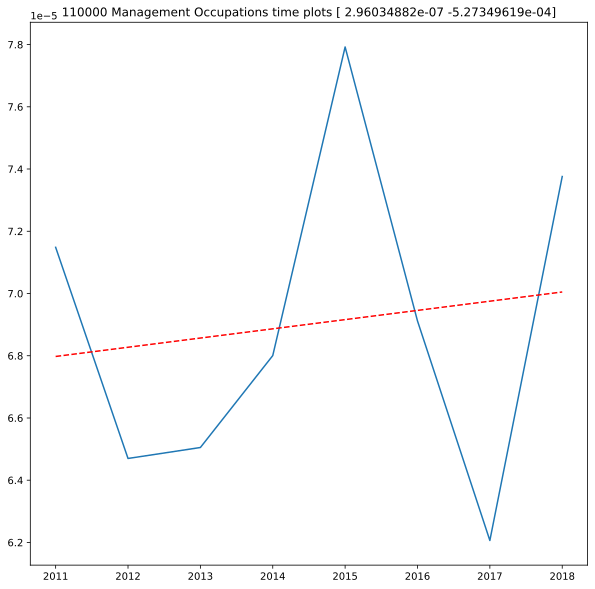

../PLOTS/./NF_SUBAVG_RACE/NF_R_2018_130000_Business_and_Financial_Operations_Occupations_time_plots_.png


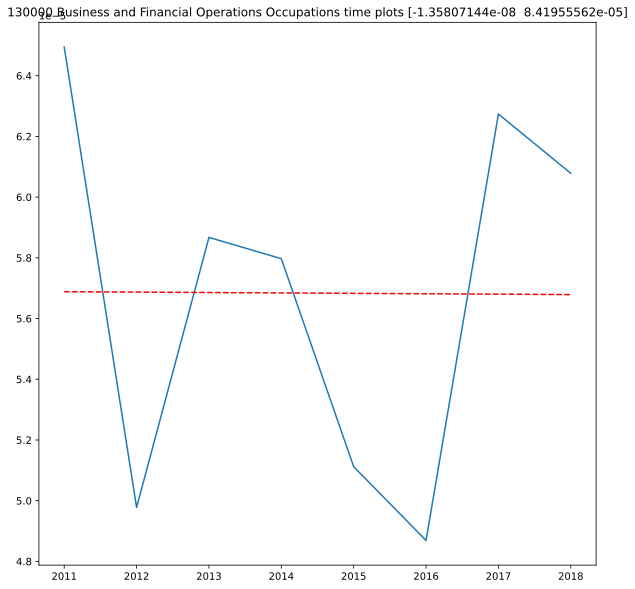

../PLOTS/./NF_SUBAVG_RACE/NF_R_2018_150000_Computer_and_Mathematical_Occupations_time_plots_.png


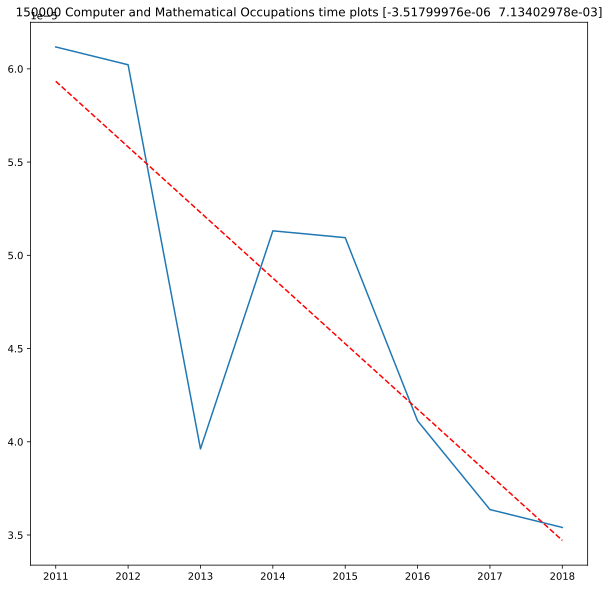

../PLOTS/./NF_SUBAVG_RACE/NF_R_2018_170000_Architecture_and_Engineering_Occupations_time_plots_.png


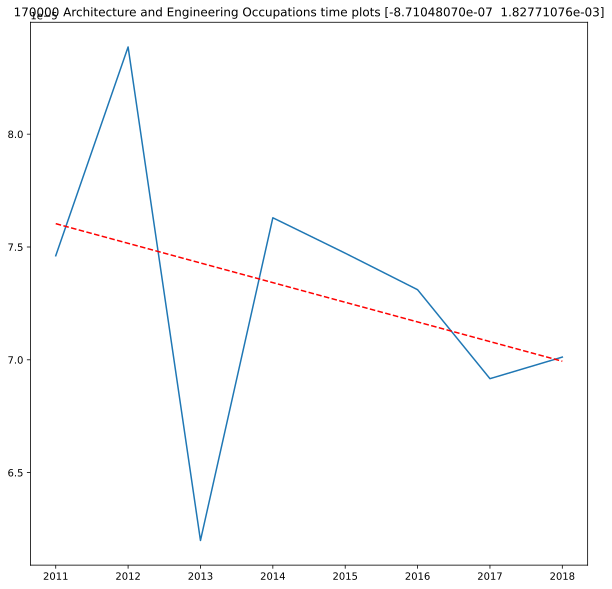

../PLOTS/./NF_SUBAVG_RACE/NF_R_2018_190000_Life_Physical_and_Social_Science_Occupations_time_plots_.png


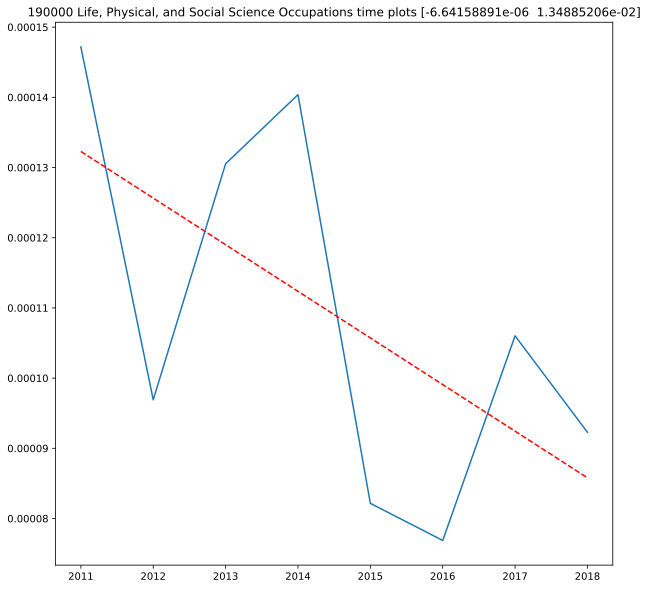

../PLOTS/./NF_SUBAVG_RACE/NF_R_2018_210000_Community_and_Social_Service_Occupations_time_plots_.png


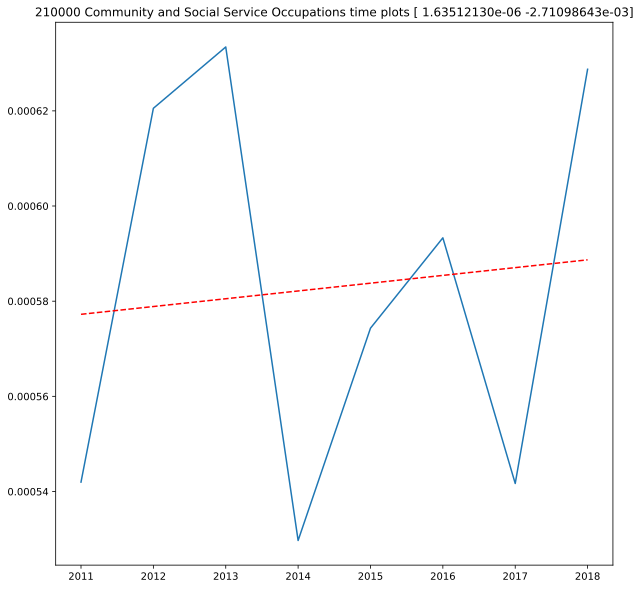

../PLOTS/./NF_SUBAVG_RACE/NF_R_2018_230000_Legal_Occupations_time_plots_.png


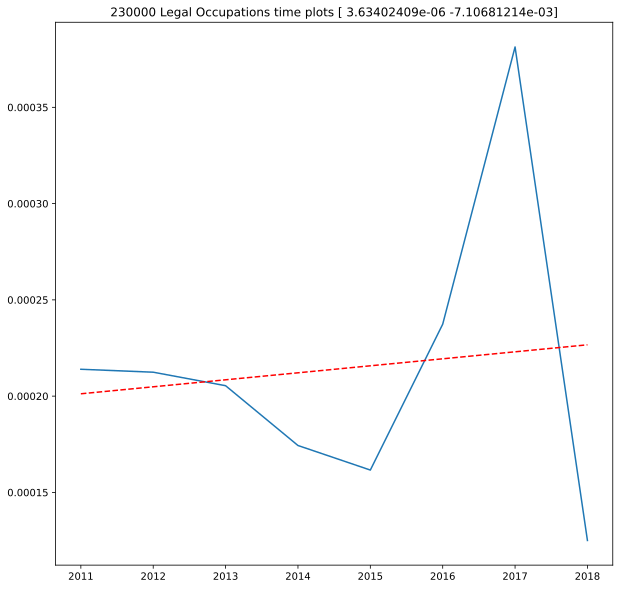

../PLOTS/./NF_SUBAVG_RACE/NF_R_2018_250000_Educational_Instruction_and_Library_Occupations_time_plots_.png


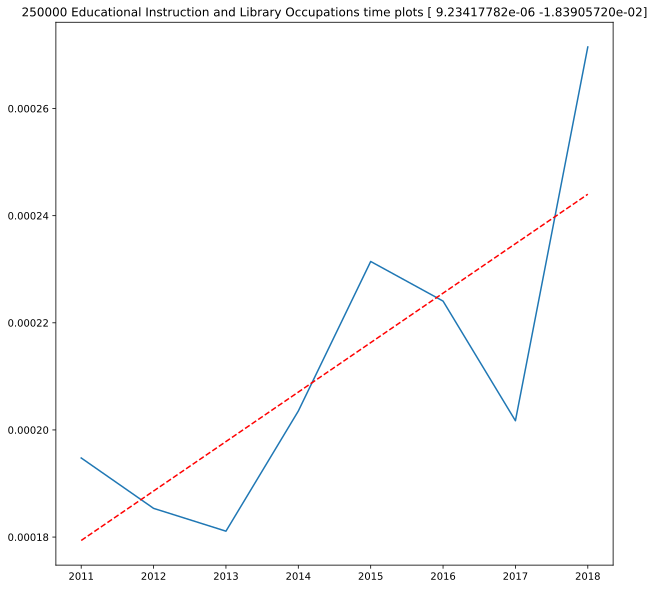

../PLOTS/./NF_SUBAVG_RACE/NF_R_2018_270000_Arts_Design_Entertainment_Sports_and_Media_Occupations_time_plots_.png


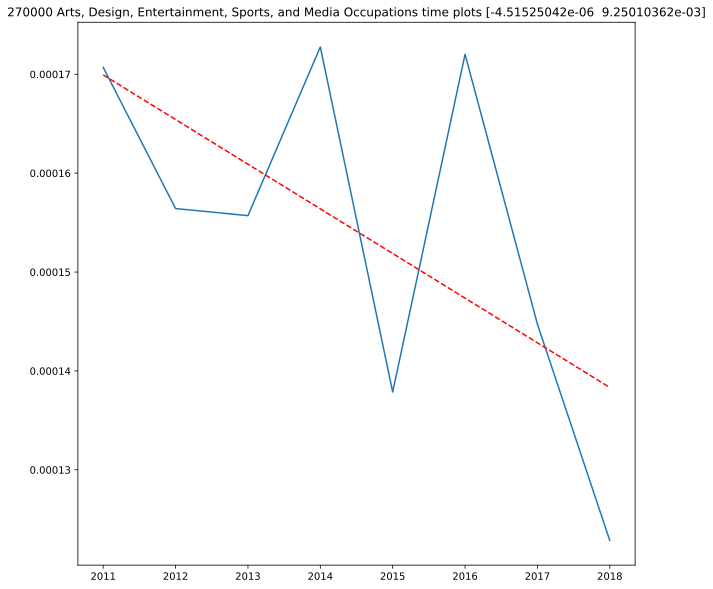

../PLOTS/./NF_SUBAVG_RACE/NF_R_2018_290000_Healthcare_Practitioners_and_Technical_Occupations_time_plots_.png


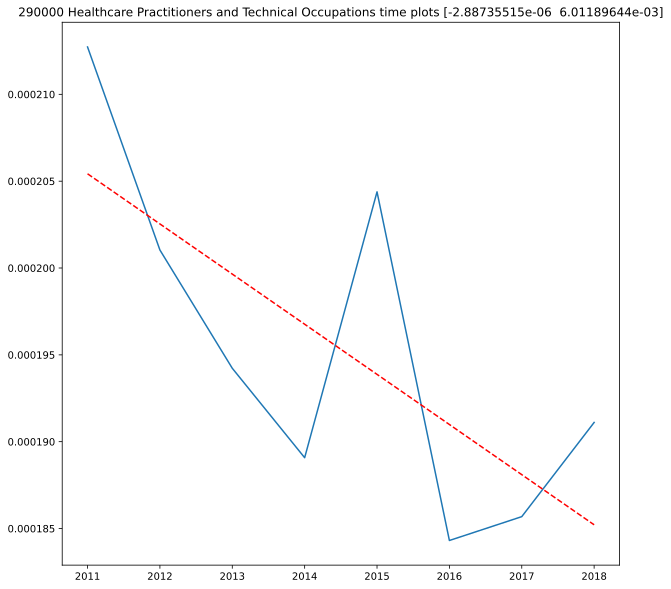

../PLOTS/./NF_SUBAVG_RACE/NF_R_2018_310000_Healthcare_Support_Occupations_time_plots_.png


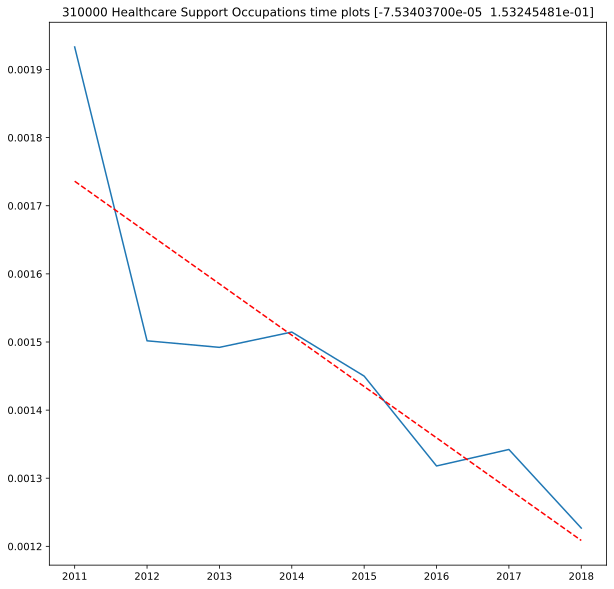

../PLOTS/./NF_SUBAVG_RACE/NF_R_2018_330000_Protective_Service_Occupations_time_plots_.png


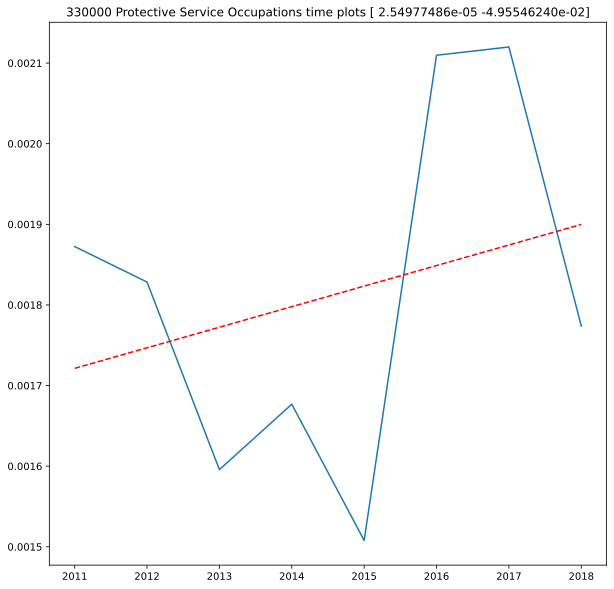

../PLOTS/./NF_SUBAVG_RACE/NF_R_2018_350000_Food_Preparation_and_Serving_Related_Occupations_time_plots_.png


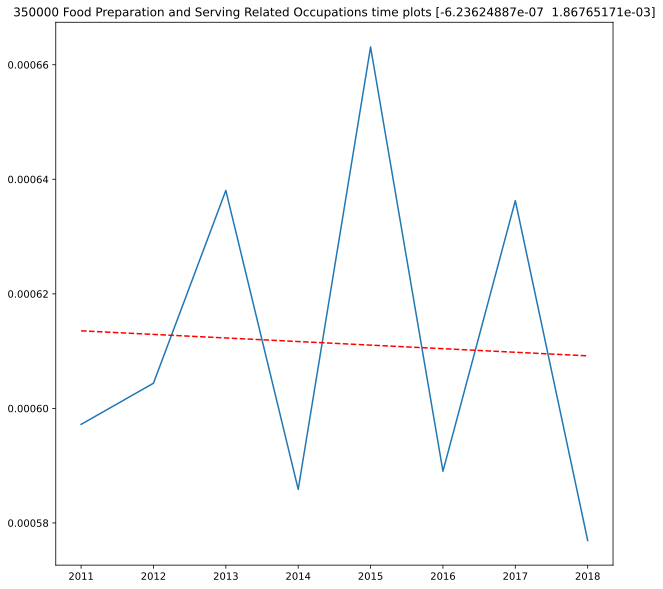

../PLOTS/./NF_SUBAVG_RACE/NF_R_2018_370000_Building_and_Grounds_Cleaning_and_Maintenance_Occupations_time_plots_.png


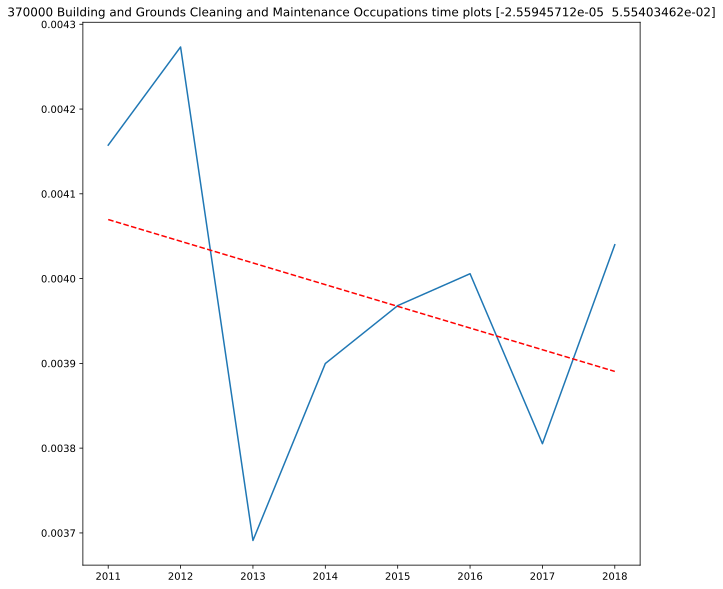

../PLOTS/./NF_SUBAVG_RACE/NF_R_2018_390000_Personal_Care_and_Service_Occupations_time_plots_.png


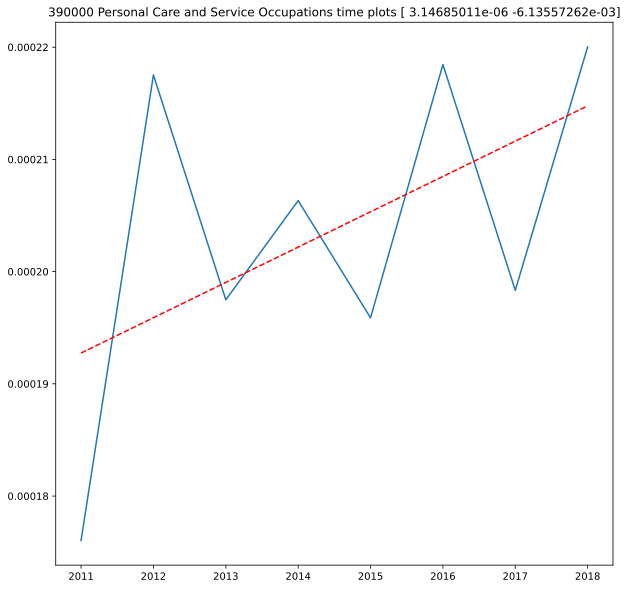

../PLOTS/./NF_SUBAVG_RACE/NF_R_2018_410000_Sales_and_Related_Occupations_time_plots_.png


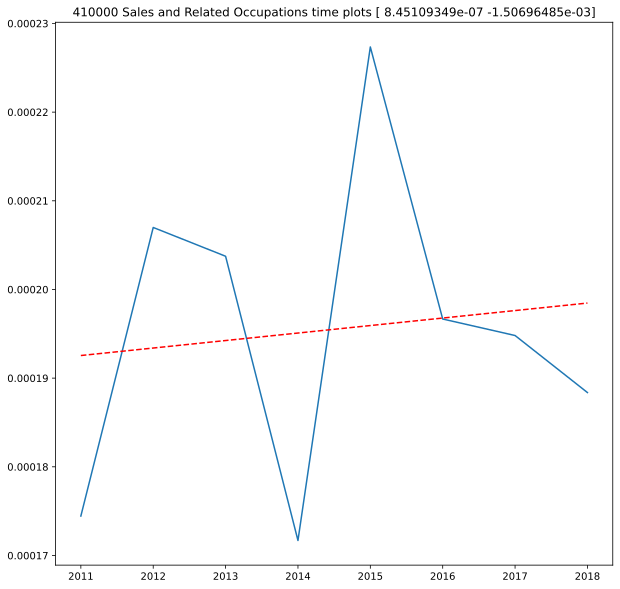

../PLOTS/./NF_SUBAVG_RACE/NF_R_2018_430000_Office_and_Administrative_Support_Occupations_time_plots_.png


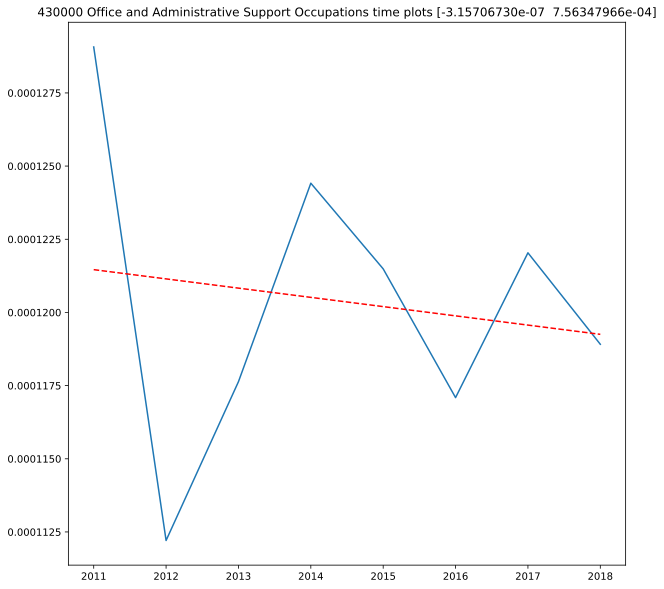

../PLOTS/./NF_SUBAVG_RACE/NF_R_2018_450000_Farming_Fishing_and_Forestry_Occupations_time_plots_.png


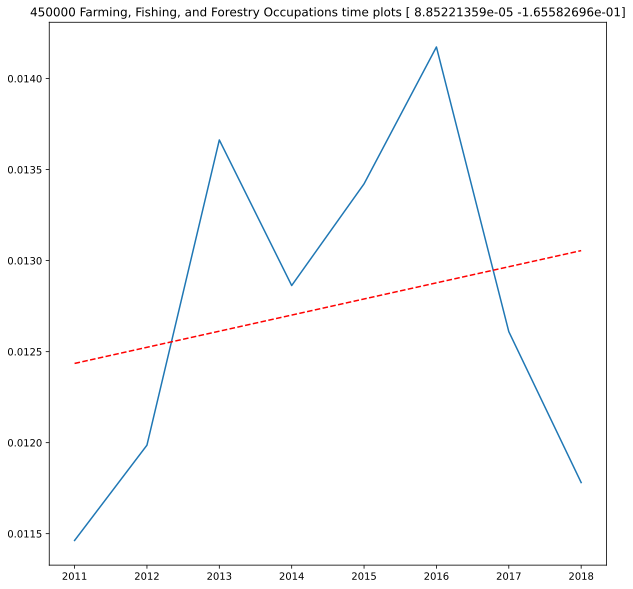

../PLOTS/./NF_SUBAVG_RACE/NF_R_2018_470000_Construction_and_Extraction_Occupations_time_plots_.png


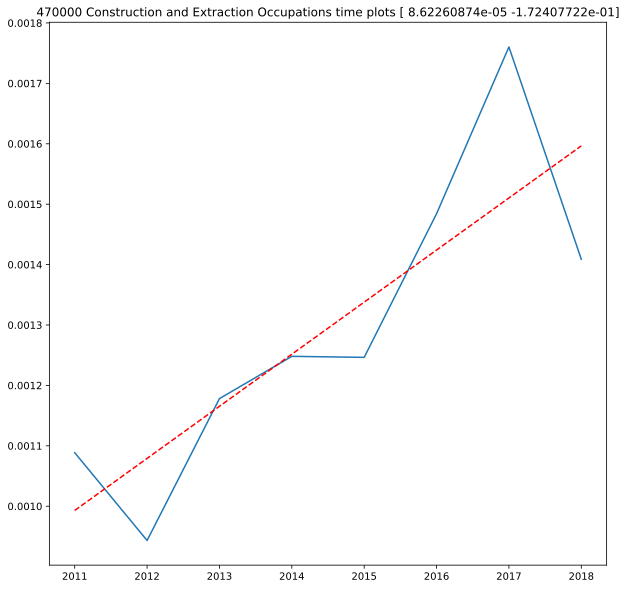

../PLOTS/./NF_SUBAVG_RACE/NF_R_2018_490000_Installation_Maintenance_and_Repair_Occupations_time_plots_.png


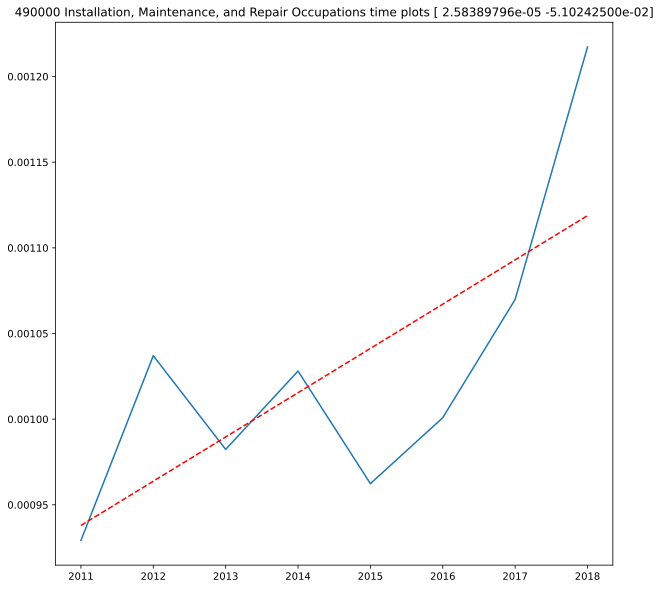

../PLOTS/./NF_SUBAVG_RACE/NF_R_2018_510000_Production_Occupations_time_plots_.png


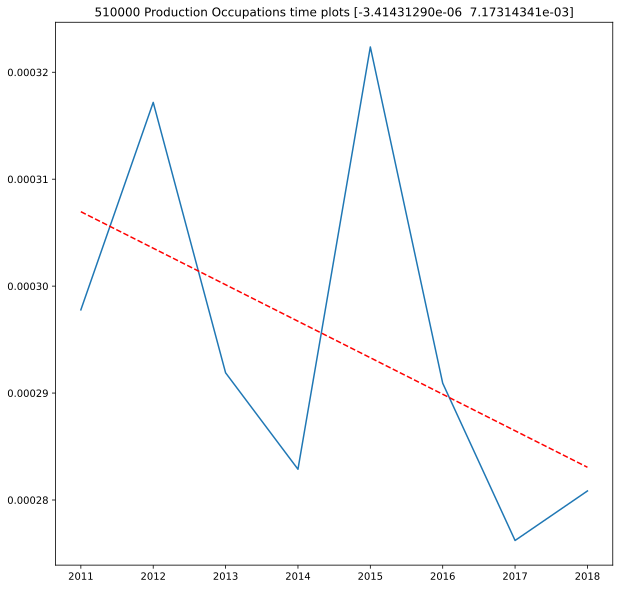

../PLOTS/./NF_SUBAVG_RACE/NF_R_2018_530000_Transportation_and_Material_Moving_Occupations_time_plots_.png


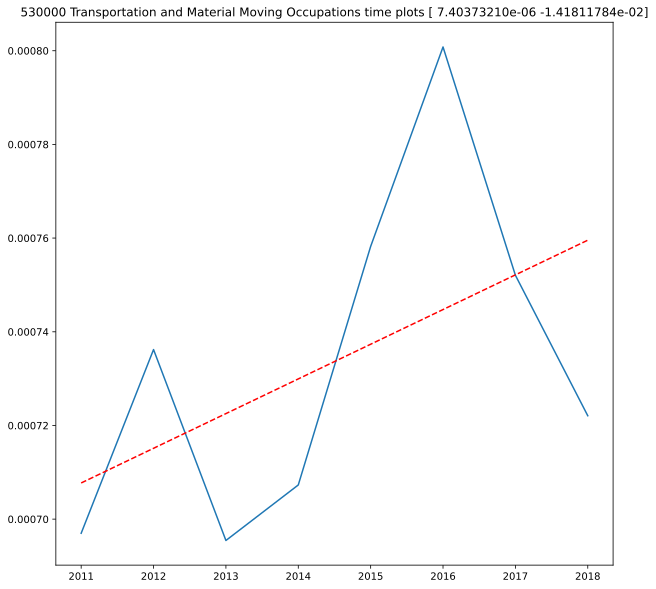

In [13]:
code_list = []
lines     = []

for i in range(0,len(global_y_soc1)):
    ucase = str(global_y_soc1[i][0]).split('-')[0]
    #print(ucase)
    ocup    = "_" + ucase[-6:-4]
    #print(ocup)
    if ocup not in code_list:
        if (str(ocup[1:]).isnumeric()):
            code_list.append(ocup)
        
print(code_list)

#code_list =  ['_11', '_13' ]

#ca = global_y_soc1[0][0].split("_")[1:3]
#use_case = ca[0] + "_" + ca[1]


for i in range(0,len(code_list)):
    
    ocup    = str(code_list[i])
    
    x = []
    y = []

    for yr in range(2011,2019):
        
        tmp_lst = []
        
        for j in range(0,len(global_y_soc1)):
        
            year = str(yr)
            case = global_y_soc1[j][0]
            
            #print(year,ocup, case)
        
            if (case.find(year) >= 0) and (case.find(ocup) >=0):
                tmp =  global_y_soc1[j][0].split('-')
                use_ocup = tmp[0][-6:-4] + "0000 " + tmp[1]
                tmp = tmp[0].split('_')
                use_var  = str(tmp[1]) + "_" + str(tmp[2])
                #use_case = use_var + " " + use_ocup
                use_case = use_ocup
                #print(use_case)
                
                data = global_y_soc1[j][1]
                #print(year,ocup,case,data)
                
                # add up all the years for the same occupation level from code_list)
                tmp_lst = tmp_lst +  data
      
    
        occupation = str(ocup[1:]) + "0000"
        
        if (len(tmp_lst) == 0):
            omean = 0.0
        else:
            omean = np.array(tmp_lst).mean()

        #print(year,occupation,omean)
        #print(" ")
 
        x.append(yr)
        y.append(omean)
        
    #print(x,y)
        
    # Curve fit
    r = []
    try:
        popt, pcov = curve_fit(func, x, y)
    except:
        popt = [0,0]
        
 
    lines.append([use_case, popt])        
        
    #display(popt, pcov)
    
    for ri in range(0+2011,len(x)+2011):
        r.append(func(ri, *popt))
        #print(ri,r)
        
    plt.figure(figsize=(10, 10))
    
    plt.plot(x,y)
    plt.plot(x,r, 'r--')
    
    title = " time plots "
    
    plt.title(use_case + title + str(popt))    
    
    save_title = "../PLOTS/" + desired_file_output + use_case + title + ".png"
    save_title = save_title.replace(",","")
    save_title = save_title.replace(" ","_")
    print(save_title)
    plt.savefig(save_title, dpi=100, bbox_inches='tight')
    
    plt.show()
    #plt.close()


In [14]:
for i in range(0,len(lines)):
    print(" y = {0: 1.8f} x + {1: 1.8f}  : {2} ".format(lines[i][1][0], lines[i][1][1], lines[i][0]))
    

 y =  0.00000030 x + -0.00052735  : 110000 Management Occupations 
 y = -0.00000001 x +  0.00008420  : 130000 Business and Financial Operations Occupations 
 y = -0.00000352 x +  0.00713403  : 150000 Computer and Mathematical Occupations 
 y = -0.00000087 x +  0.00182771  : 170000 Architecture and Engineering Occupations 
 y = -0.00000664 x +  0.01348852  : 190000 Life, Physical, and Social Science Occupations 
 y =  0.00000164 x + -0.00271099  : 210000 Community and Social Service Occupations 
 y =  0.00000363 x + -0.00710681  : 230000 Legal Occupations 
 y =  0.00000923 x + -0.01839057  : 250000 Educational Instruction and Library Occupations 
 y = -0.00000452 x +  0.00925010  : 270000 Arts, Design, Entertainment, Sports, and Media Occupations 
 y = -0.00000289 x +  0.00601190  : 290000 Healthcare Practitioners and Technical Occupations 
 y = -0.00007534 x +  0.15324548  : 310000 Healthcare Support Occupations 
 y =  0.00002550 x + -0.04955462  : 330000 Protective Service Occupations

# CALC COV 

In [15]:
cov_array = []

code_list = []
lines     = []

for i in range(0,len(global_y_soc1)):
    ucase = str(global_y_soc1[i][0]).split('-')[0]
    #print(ucase)
    ocup    = "_" + ucase[-6:-4]
    #print(ocup)
    if ocup not in code_list:
        if (str(ocup[1:]).isnumeric()):
            code_list.append(ocup)

print(code_list)

['_11', '_13', '_15', '_17', '_19', '_21', '_23', '_25', '_27', '_29', '_31', '_33', '_35', '_37', '_39', '_41', '_43', '_45', '_47', '_49', '_51', '_53']


In [16]:
# ['_11', '_13' .... ]

#ca = global_y_soc1[0][0].split("_")[1:3]
#use_case = ca[0] + "_" + ca[1]

for i in range(0,len(code_list)):
       
    ocup    = str(code_list[i])
    
    x = []
    y = []

    for yr in range(2011,2019):
        
        tmp_lst = []
        
        for j in range(0,len(global_y_soc1)):
            
            year  = str(yr)
            case1 = global_y_soc1[j][0].split("-")[0][0:4]
            case2 = global_y_soc1[j][0].split("-")[0][-7:]
            
            #print(case1, case2,ocup)
        
            if (case1.find(year) >= 0) and (case2.find(ocup) >=0):
                
                tmp =  global_y_soc1[j][0].split('-')
                use_ocup = tmp[0][-6:-4] + "0000 " + tmp[1]
                tmp = tmp[0].split('_')
                use_var  = str(tmp[1]) + "_" + str(tmp[2])
                #use_case = use_var + " " + use_ocup
                use_case = use_ocup
                #print(use_case)
                
                data = global_y_soc1[j][1]
                #print(year,ocup,case,data)
                
                # add up all the years for the same occupation level from code_list)
                tmp_lst = tmp_lst +  data
      
    
        occupation = str(ocup[1:]) + "0000"
        omean = np.array(tmp_lst).mean()
        
        if (math.isnan(omean)):
            omean = 0.0

        #print(year,occupation,omean)
        #print(" ")
        
        x.append(yr)
        y.append(omean)
        

    #print(x,y)
        
    # Curve fit
    r = []
    try:
        popt, pcov = curve_fit(func, x, y)
    except:
        popt = [0,0]
        
    #ca = global_y_soc1[0][0].split("_")[1:3]
    #use_case = ca[0] + "_" + ca[1] + ocup + "0000"
                   
    omean = np.array(y).mean()
    
    if (math.isnan(omean)):
        ocov = 0.0
    else:
        ostd  = np.array(y).std()
        ocov  = ostd/omean
        
    #ocov.append(str(use_case),ocov)
    print("***",use_case,ocov)
    
    if (ocov >= 0):
        cov_array.append([str(use_case),ocov])
    else:
        print("########ERROR#######")
       

*** 110000 Management Occupations 0.0709220134303468
*** 130000 Business and Financial Operations Occupations 0.10215421407713053
*** 150000 Computer and Mathematical Occupations 0.2054282733387599
*** 170000 Architecture and Engineering Occupations 0.08086781841326965
*** 190000 Life, Physical, and Social Science Occupations 0.23138844850305645
*** 210000 Community and Social Service Occupations 0.06767628292396015
*** 230000 Legal Occupations 0.3340687579832559
*** 250000 Educational Instruction and Library Occupations 0.13153215204149027
*** 270000 Arts, Design, Entertainment, Sports, and Media Occupations 0.10952464022866447
*** 290000 Healthcare Practitioners and Technical Occupations 0.04754228139820962
*** 310000 Healthcare Support Occupations 0.13517575902796844
*** 330000 Protective Service Occupations 0.11492632567730689
*** 350000 Food Preparation and Serving Related Occupations 0.04695607992153008
*** 370000 Building and Grounds Cleaning and Maintenance Occupations 0.043727

In [17]:
print(cov_array)

[['110000 Management Occupations', 0.0709220134303468], ['130000 Business and Financial Operations Occupations', 0.10215421407713053], ['150000 Computer and Mathematical Occupations', 0.2054282733387599], ['170000 Architecture and Engineering Occupations', 0.08086781841326965], ['190000 Life, Physical, and Social Science Occupations', 0.23138844850305645], ['210000 Community and Social Service Occupations', 0.06767628292396015], ['230000 Legal Occupations', 0.3340687579832559], ['250000 Educational Instruction and Library Occupations', 0.13153215204149027], ['270000 Arts, Design, Entertainment, Sports, and Media Occupations', 0.10952464022866447], ['290000 Healthcare Practitioners and Technical Occupations', 0.04754228139820962], ['310000 Healthcare Support Occupations', 0.13517575902796844], ['330000 Protective Service Occupations', 0.11492632567730689], ['350000 Food Preparation and Serving Related Occupations', 0.04695607992153008], ['370000 Building and Grounds Cleaning and Mainten

In [18]:
test_list = cov_array.copy()
    
# sort list of list
# sort by second index
test_list.sort(key = lambda test_list: test_list[1])
 
# printing result
for i in range(0,len(test_list)):
    print("{0:1.7f} \t {1:} ".format(test_list[i][1], str(test_list[i][0])))    

0.0397429 	 430000 Office and Administrative Support Occupations 
0.0437272 	 370000 Building and Grounds Cleaning and Maintenance Occupations 
0.0459460 	 530000 Transportation and Material Moving Occupations 
0.0469561 	 350000 Food Preparation and Serving Related Occupations 
0.0475423 	 290000 Healthcare Practitioners and Technical Occupations 
0.0532625 	 510000 Production Occupations 
0.0676763 	 210000 Community and Social Service Occupations 
0.0688717 	 390000 Personal Care and Service Occupations 
0.0708503 	 450000 Farming, Fishing, and Forestry Occupations 
0.0709220 	 110000 Management Occupations 
0.0802921 	 490000 Installation, Maintenance, and Repair Occupations 
0.0808678 	 170000 Architecture and Engineering Occupations 
0.0862881 	 410000 Sales and Related Occupations 
0.1021542 	 130000 Business and Financial Operations Occupations 
0.1095246 	 270000 Arts, Design, Entertainment, Sports, and Media Occupations 
0.1149263 	 330000 Protective Service Occupations 
0.13

# MEAN

In [19]:
mean_array = []

code_list = []
lines     = []

for i in range(0,len(global_y_soc1)):
    ucase = str(global_y_soc1[i][0]).split('-')[0]
    #print(ucase)
    ocup    = "_" + ucase[-6:-4]
    #print(ocup)
    if ocup not in code_list:
        if (str(ocup[1:]).isnumeric()):
            code_list.append(ocup)
        
print(code_list)

# ['_11', '_13' .... ]

#ca = global_y_soc1[0][0].split("_")[1:3]
#use_case = ca[0] + "_" + ca[1]


for i in range(0,len(code_list)):
    
    
    ocup    = str(code_list[i])
    
    x = []
    y = []

    for yr in range(2011,2019):
        
        tmp_lst = []
        
        for j in range(0,len(global_y_soc1)):
            
            year  = str(yr)
            case1 = global_y_soc1[j][0].split("-")[0][0:4]
            case2 = global_y_soc1[j][0].split("-")[0][-7:]
            
            #print(case1, case2,ocup)
        
            if (case1.find(year) >= 0) and (case2.find(ocup) >=0):
                
                tmp =  global_y_soc1[j][0].split('-')
                use_ocup = tmp[0][-6:-4] + "0000 " + tmp[1]
                tmp = tmp[0].split('_')
                use_var  = str(tmp[1]) + "_" + str(tmp[2])
                #use_case = use_var + " " + use_ocup
                use_case = use_ocup
                #print(use_case)
                
                data = global_y_soc1[j][1]
                #print(year,ocup,case,data)
                
                # add up all the years for the same occupation level from code_list)
                tmp_lst = tmp_lst +  data
      
    
        occupation = str(ocup[1:]) + "0000"
        omean = np.array(tmp_lst).mean()
        
        if (math.isnan(omean)):
            omean = 0.0
        
        #print(year,occupation,omean)
        #print(" ")
        
        x.append(yr)
        y.append(omean)
        
    #print(x,y)
        
    # Curve fit
    r = []
    try:
        popt, pcov = curve_fit(func, x, y)
    except:
        popt = [0,0]
        
    #ca = global_y_soc1[0][0].split("_")[1:3]
    #use_case = ca[0] + "_" + ca[1] + ocup + "0000"
                   
    omean = np.array(y).mean()
    #ostd  = np.array(y).std()
    #ocov  = ostd/omean 
    #ocov.append(str(use_case),ocov)
    print(use_case,omean)
    
    if (omean >= 0):
        mean_array.append([str(use_case),omean])

['_11', '_13', '_15', '_17', '_19', '_21', '_23', '_25', '_27', '_29', '_31', '_33', '_35', '_37', '_39', '_41', '_43', '_45', '_47', '_49', '_51', '_53']
110000 Management Occupations 6.901265117223978e-05
130000 Business and Financial Operations Occupations 5.6837207064758614e-05
150000 Computer and Mathematical Occupations 4.701927303385093e-05
170000 Architecture and Engineering Occupations 7.298442404173744e-05
190000 Life, Physical, and Social Science Occupations 0.00010903969993791615
210000 Community and Social Service Occupations 0.0005829654188628417
230000 Legal Occupations 0.00021392939362404573
250000 Educational Instruction and Library Occupations 0.00021167918906970137
270000 Arts, Design, Entertainment, Sports, and Media Occupations 0.00015413165430117157
290000 Healthcare Practitioners and Technical Occupations 0.00019531949487734993
310000 Healthcare Support Occupations 0.001472305701813497
330000 Protective Service Occupations 0.0018105906199403531
350000 Food Prepar

In [20]:
test_list = mean_array.copy()
    
# sort list of list
# sort by second index
test_list.sort(key = lambda test_list: test_list[1])
 
# printing result
for i in range(0,len(test_list)):
    print("{0:1.7f} \t {1:} ".format(test_list[i][1], str(test_list[i][0])))    
    
    
# create sorted order index list
sorted_order = []
for i in range(0,len(test_list)):
    idx = str(test_list[i][0]).split(" ")[0][0:2]
    nidx = int( (int(idx) - 11) / 2 )
    sorted_order.append(nidx)
    
print(sorted_order)

0.0000470 	 150000 Computer and Mathematical Occupations 
0.0000568 	 130000 Business and Financial Operations Occupations 
0.0000690 	 110000 Management Occupations 
0.0000730 	 170000 Architecture and Engineering Occupations 
0.0001090 	 190000 Life, Physical, and Social Science Occupations 
0.0001204 	 430000 Office and Administrative Support Occupations 
0.0001541 	 270000 Arts, Design, Entertainment, Sports, and Media Occupations 
0.0001953 	 290000 Healthcare Practitioners and Technical Occupations 
0.0001955 	 410000 Sales and Related Occupations 
0.0002038 	 390000 Personal Care and Service Occupations 
0.0002117 	 250000 Educational Instruction and Library Occupations 
0.0002139 	 230000 Legal Occupations 
0.0002950 	 510000 Production Occupations 
0.0005830 	 210000 Community and Social Service Occupations 
0.0006114 	 350000 Food Preparation and Serving Related Occupations 
0.0007336 	 530000 Transportation and Material Moving Occupations 
0.0010284 	 490000 Installation, Ma

# COV LEVEL 3

In [21]:
code_list = []
soc_level = 3

for i in range(0,len(global_y_soc1)):
    ucase = str(global_y_soc1[i][0]).split('-')[0]
    #print(ucase)
    ocup    = "_" + ucase[-6:-5 + soc_level]
    #print(ocup)
    if ocup not in code_list:
        if (str(ocup[1:]).isnumeric()):
            code_list.append(ocup)
        
print(code_list)

['_1110', '_1120', '_1130', '_1131', '_1190', '_1191', '_1310', '_1311', '_1320', '_1511', '_1520', '_1710', '_1720', '_1721', '_1730', '_1910', '_1920', '_1930', '_1940', '_2110', '_2120', '_2310', '_2320', '_2510', '_2511', '_2520', '_2530', '_2540', '_2590', '_2710', '_2720', '_2730', '_2740', '_2910', '_2911', '_2920', '_2990', '_3110', '_3120', '_3190', '_3310', '_3320', '_3330', '_3390', '_3510', '_3520', '_3530', '_3590', '_3710', '_3720', '_3730', '_3910', '_3920', '_3930', '_3940', '_3950', '_3960', '_3970', '_3990', '_4110', '_4120', '_4130', '_4140', '_4190', '_4310', '_4320', '_4330', '_4340', '_4341', '_4350', '_4351', '_4360', '_4390', '_4391', '_4510', '_4520', '_4530', '_4540', '_4710', '_4720', '_4721', '_4722', '_4730', '_4740', '_4750', '_4910', '_4920', '_4930', '_4990', '_5110', '_5120', '_5130', '_5140', '_5141', '_5151', '_5160', '_5170', '_5180', '_5190', '_5191', '_5310', '_5320', '_5330', '_5340', '_5350', '_5360', '_5370', '_5371']


In [22]:
cov_array = []

lines     = []

# ['_11', '_13' .... ]

#ca = global_y_soc1[0][0].split("_")[1:3]
#use_case = ca[0] + "_" + ca[1]

soc_level = 3

for i in range(0,len(code_list)):
    
    ocup    = str(code_list[i])
    
    x = []
    y = []

    for yr in range(2011,2019):
        
        tmp_lst = []
        
        for j in range(0,len(global_y_soc1)):
            
            year  = str(yr)
            case1 = global_y_soc1[j][0].split("-")[0][0:4]
            case2 = global_y_soc1[j][0].split("-")[0][-7:]
            
            #print(case1, case2,ocup)
        
            if (case1.find(year) >= 0) and (case2.find(ocup) >=0):
                
                tmp =  global_y_soc1[j][0].split('-')
                use_ocup = tmp[0][-6:-4] + "0000 " + tmp[1]
                tmp = tmp[0].split('_')
                use_var  = str(tmp[1]) + "_" + str(tmp[2])
                #use_case = use_var + " " + use_ocup
                use_case = use_ocup
                #print(use_case)
                
                data = global_y_soc1[j][1]
                #print(year,ocup,case,data)
                
                # add up all the years for the same occupation level from code_list)
                tmp_lst = tmp_lst +  data
      
    
        occupation = str(ocup[1:]) + "0000"
        omean = np.array(tmp_lst).mean()
        
        if (math.isnan(omean)):
            omean = 0.0
        
        #print(year,occupation,omean)
        #print(" ")
        
        x.append(yr)
        y.append(omean)
        
    #print(x,y)
                   
    omean = np.array(y).mean()
    ostd  = np.array(y).std()
    ocov  = ostd/omean 
    #ocov.append(str(use_case),ocov)
    print(use_case, ocov)
    
    if (ocov >= 0):
        cov_array.append([str(use_case),ocov])

110000 Management Occupations 0.21724390083699333
110000 Management Occupations 0.21461644692127216
110000 Management Occupations 0.17241355306557773
110000 Management Occupations 0.8736593747266413
110000 Management Occupations 0.11214976923938101
110000 Management Occupations 0.14745365334135657
130000 Business and Financial Operations Occupations 0.18664061462635556
130000 Business and Financial Operations Occupations 0.1280948424524426
130000 Business and Financial Operations Occupations 0.17158184273413554
150000 Computer and Mathematical Occupations 0.2095431911106132
150000 Computer and Mathematical Occupations 0.4122905245020145
170000 Architecture and Engineering Occupations 0.4588664438182946
170000 Architecture and Engineering Occupations 0.3033592606196236
170000 Architecture and Engineering Occupations 0.23532747742140692
170000 Architecture and Engineering Occupations 0.12455208317760776
190000 Life, Physical, and Social Science Occupations 0.2318923883629904
190000 Life,

In [23]:
test_list = cov_array.copy()
    
# sort list of list
# sort by second index
test_list.sort(key = lambda test_list: test_list[1])
 
# printing result
for i in range(0,len(test_list)):
    print("{0:1.7f} \t {1:} ".format(test_list[i][1], str(test_list[i][0])))    

0.0374730 	 290000 Healthcare Practitioners and Technical Occupations 
0.0474950 	 490000 Installation, Maintenance, and Repair Occupations 
0.0520434 	 370000 Building and Grounds Cleaning and Maintenance Occupations 
0.0543099 	 350000 Food Preparation and Serving Related Occupations 
0.0593513 	 530000 Transportation and Material Moving Occupations 
0.0642038 	 510000 Production Occupations 
0.0677316 	 450000 Farming, Fishing, and Forestry Occupations 
0.0691528 	 350000 Food Preparation and Serving Related Occupations 
0.0730378 	 290000 Healthcare Practitioners and Technical Occupations 
0.0731211 	 210000 Community and Social Service Occupations 
0.0758411 	 510000 Production Occupations 
0.0874157 	 510000 Production Occupations 
0.0877584 	 510000 Production Occupations 
0.0895643 	 530000 Transportation and Material Moving Occupations 
0.0925879 	 490000 Installation, Maintenance, and Repair Occupations 
0.0954645 	 430000 Office and Administrative Support Occupations 
0.0980

# VARIANCE ACROSS 

In [24]:
def get_case_list(soc_level, desired_case):
    code_list = []

    #soc_level = 1
    #desired_case = "16to19"

    global global_y_soc1
    
    for i in range(0,len(global_y_soc1)):
        ucase = str(global_y_soc1[i][0]).split('-')[0]
        #print(ucase)
        
        if (ucase.find("NO DATA FOUND") < 0):
            ocup    = "_" + desired_case + "_" + ucase[-6:-5 + soc_level]
            #print(ocup)
            if ocup not in code_list:
                code_list.append(ocup)
                #if (str(ocup[1:]).isnumeric()):
                #    code_list.append(ocup)
        
    #print(code_list)
    
    return(code_list)

In [25]:
#soc_level = 1
#desired_case = "16to19"
#
#get_case_list(soc_level, desired_case)

In [26]:
print(sorted_order)

[2, 1, 0, 3, 4, 16, 8, 9, 15, 14, 7, 6, 20, 5, 12, 21, 19, 18, 10, 11, 13, 17]


In [37]:
cases = ["White", "AfricanAmerican", "Asian", "Hispanic" ]

mult_array = []

for desired_case in cases:

    soc_level = 1
    #desired_case = "16to19"

    code_list = get_case_list(soc_level, desired_case)
    
    #print(code_list)

    cov_array = []

    #for i in range(0,len(code_list)):
    for i in swivel_order:
    #for i in sorted_order:
    
        use_case = str(soc_new_code[i+1][0][0:2]) + "0000" + " " + str(soc_new_code[i+1][1]) 
        
        ocup    = str(code_list[i])
    
        x = []
        y = []

        for yr in range(2011,2019):
        
            tmp_lst = []
        
            for j in range(0,len(global_y_soc1)):
            
                year  = str(yr)
                case1 = global_y_soc1[j][0].split("-")[0][0:4]
                case2 = global_y_soc1[j][0].split("-")[0][-7:]
                case3 = global_y_soc1[j][0].split("-")[0][4:-7]
                
                #print(ocup,case1,case2,case3)
        
                if  (case1.find(year) >= 0) and (case2.find(ocup[-3:]) >=0) and (case3.find(ocup[0:-3]) >= 0):
                
                    #print(case1, case2, case3, ocup)
                
                    tmp =  global_y_soc1[j][0].split('-')
                    
                    #print(tmp)
                    #stop()
                    
                    use_ocup = tmp[0][-6:-4] + "0000 " + tmp[1]
                    tmp = tmp[0].split('_')
                    use_var  = str(tmp[1]) + "_" + str(tmp[2])
                    #use_case = use_var + " " + use_ocup
                    #use_case = use_ocup
                    #print(use_case)
                
                    data = global_y_soc1[j][1]
                    #print(year,ocup,case,data)
                
                    # add up all the years for the same occupation level from code_list)
                    tmp_lst = tmp_lst +  data
                    
                    #print(tmp_lst)
      
      
            occupation = str(ocup[1:]) + "0000"
        
            #print(tmp_lst)
            if (len(tmp_lst) == 0):
                mean = 0.0
            else:
                omean = np.array(tmp_lst).mean()
            
            #print(year,occupation,omean)
            #print(" ")
        
            x.append(yr)
            y.append(omean)
        
        #print(x,y)
                   
        omean = np.array(y).mean()
        ostd  = np.array(y).std()
        ocov  = ostd/omean 
    
        if math.isnan(ocov):
            ocov = 0.0
        
        ocov_case = desired_case + " " + use_case
    
        #ocov.append(str(use_case),ocov)
        #print(ocov_case, ocov)

        cov_array.append([str(ocov_case),ocov])
        
    mult_array.append([str(desired_case),cov_array])
    
    # SORT LIST
    
    #test_list = cov_array.copy()
    
    # sort list of list
    # sort by second index
    #test_list.sort(key = lambda test_list: test_list[1])
 
    # printing result
    #for i in range(0,len(test_list)):
        #print("{0:1.7f} \t {1:} ".format(test_list[i][1], str(test_list[i][0]))) 
        
    for i in range(0,len(cov_array)):
        print("{0:1.7f} \t {1:} ".format(cov_array[i][1], str(cov_array[i][0]))) 

    print(" ")

0.2309570 	 White 150000 Computer and Mathematical Occupations 
0.2017132 	 White 130000 Business and Financial Operations Occupations 
0.0730437 	 White 250000 Educational Instruction and Library Occupations 
0.1243379 	 White 170000 Architecture and Engineering Occupations 
0.0890454 	 White 430000 Office and Administrative Support Occupations 
0.2888393 	 White 230000 Legal Occupations 
0.0553859 	 White 350000 Food Preparation and Serving Related Occupations 
0.1114147 	 White 290000 Healthcare Practitioners and Technical Occupations 
0.1943575 	 White 310000 Healthcare Support Occupations 
0.2650625 	 White 190000 Life, Physical, and Social Science Occupations 
0.0872705 	 White 210000 Community and Social Service Occupations 
0.1098720 	 White 410000 Sales and Related Occupations 
0.1375068 	 White 270000 Arts, Design, Entertainment, Sports, and Media Occupations 
0.0634283 	 White 390000 Personal Care and Service Occupations 
0.0951828 	 White 510000 Production Occupations 
0.05

In [38]:
print(mult_array[2][1])

[['Asian 150000 Computer and Mathematical Occupations', 0.6648037571235073], ['Asian 130000 Business and Financial Operations Occupations', 0.3532064890377112], ['Asian 250000 Educational Instruction and Library Occupations', 0.5103959297215575], ['Asian 170000 Architecture and Engineering Occupations', 0.6172339732854776], ['Asian 430000 Office and Administrative Support Occupations', 0.08769795821367939], ['Asian 230000 Legal Occupations', 2.492390172194219], ['Asian 350000 Food Preparation and Serving Related Occupations', 0.15001919311799153], ['Asian 290000 Healthcare Practitioners and Technical Occupations', 0.10599345408517669], ['Asian 310000 Healthcare Support Occupations', 0.1154096262252512], ['Asian 190000 Life, Physical, and Social Science Occupations', 0.45274941998231294], ['Asian 210000 Community and Social Service Occupations', 0.2273166071385646], ['Asian 410000 Sales and Related Occupations', 0.2593533188346855], ['Asian 270000 Arts, Design, Entertainment, Sports, an

../PLOTS/./NF_SUBAVG_RACE/NF_R_2018_Coef_by_RACE.png


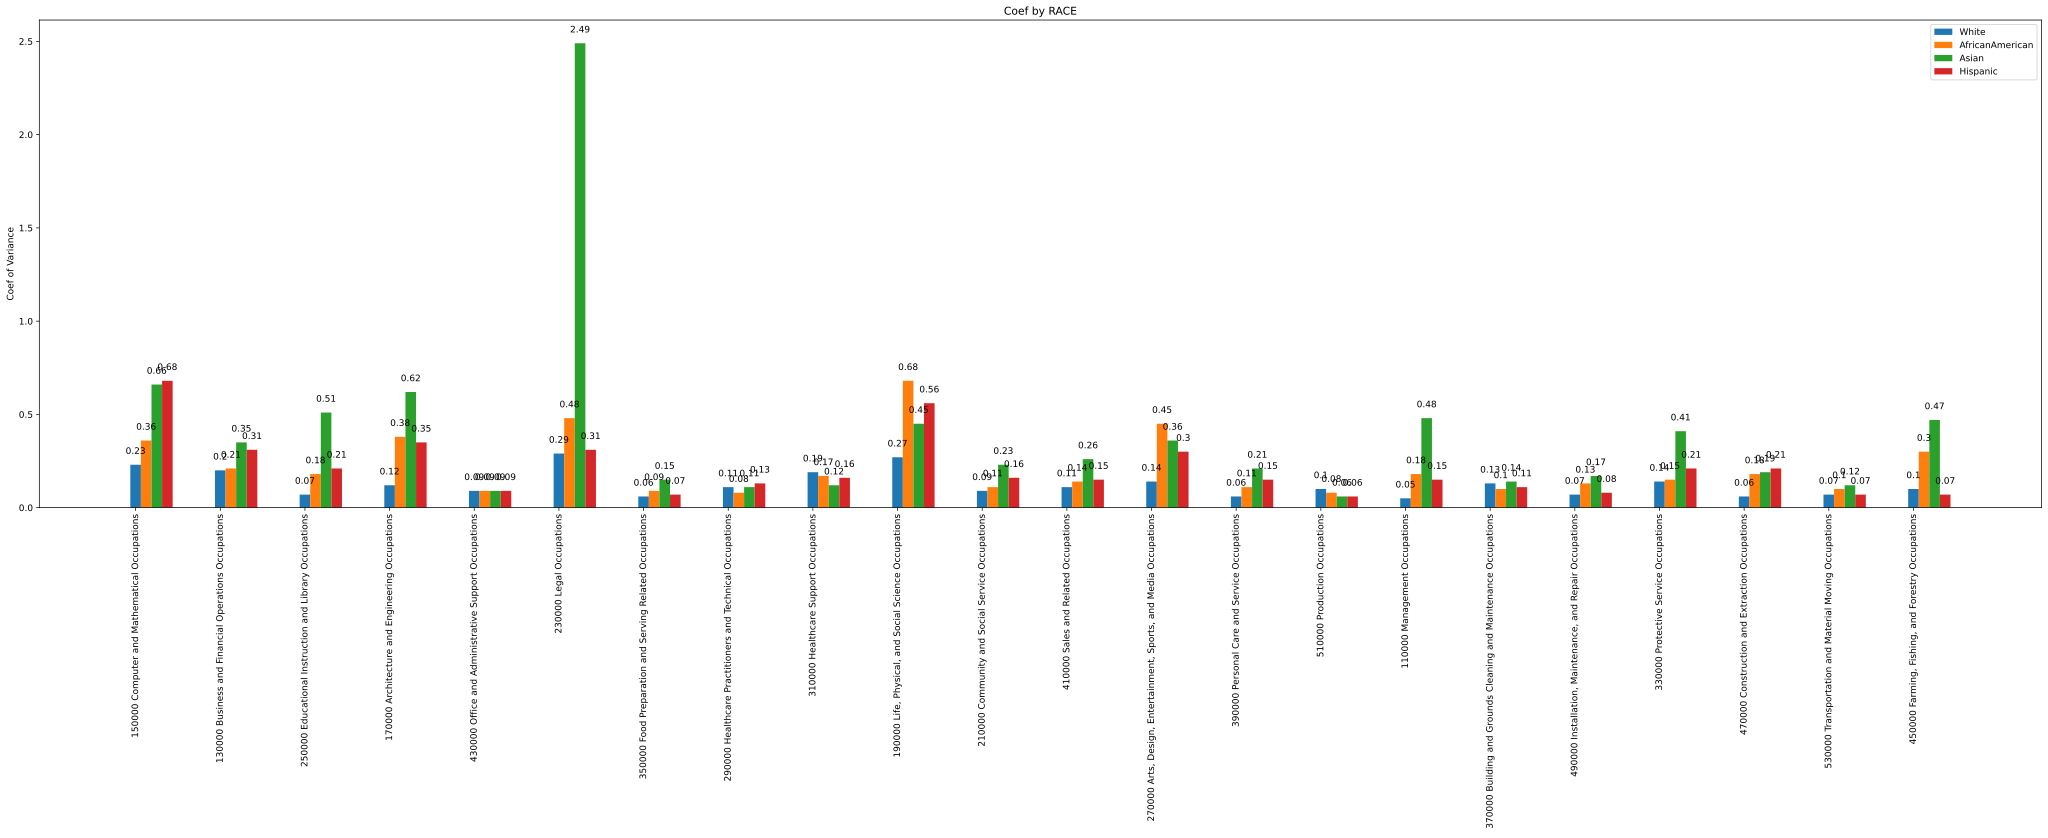

In [39]:
labels = []

for a in range(0,len(mult_array)):

    for i in range(0,len(mult_array[a][1])):
        line = mult_array[a][1][i]
        larr = str(line[0]).split(" ")
        lbl  = ""
        #print(larr)
        for j in range(0,len(larr[1:])):
            new_lbl = str(larr[1+j])
            lbl = lbl + " " + new_lbl
        #print(lbl)

        if lbl not in labels:
            labels.append(lbl)
        
#print(labels)

groups = len(mult_array)
grpd = []
grpl = []
for i in range(0,len(mult_array)):
    subgrp = []
    # Get value point by point
    for j in range(0,len(mult_array[i][1])):
        val = mult_array[i][1][j][1]
        val = round(val,2)
        subgrp.append(val)

    #print(subgrp)
    grpl.append(mult_array[i][0])
    grpd.append(subgrp)

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

rects = []

fig, ax = plt.subplots(figsize=(40, 10))

for i in range(0,len(grpd)):
    tmp_rect = ax.bar(x+i*(width/2), grpd[i], width/2, label=grpl[i])
    rects.append(tmp_rect)
    
    
# Add bar for relative population size
#total_ocup = np.array(total_male) + np.array(total_female)
#pop_scaled = np.array(grpd).max() / total_ocup[0:-1].max() * total_ocup
#i=i+1
#tmp_rect = ax.bar(x+i*(width/2), pop_scaled[0:-1], width/2, label='Population')
#rects.append(tmp_rect)


title = "Coef by RACE"
    
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Coef of Variance')
ax.set_title(title)
ax.set_xticks(x, labels, rotation=90)
ax.legend()

#ax.set_ylim(0, 0.25)

for i in range(0,len(grpd)):
    ax.bar_label(rects[i], padding=10)

#fig.tight_layout() 
    
save_title = "../PLOTS/" + desired_file_output + title + ".png"
save_title = save_title.replace(",","")
save_title = save_title.replace(" ","_")
print(save_title)
plt.savefig(save_title, dpi=100, bbox_inches='tight')
    
plt.show()
#plt.close()
    


# MEAN

In [40]:
cases = ["White", "AfricanAmerican", "Asian", "Hispanic" ]

mult_array = []

for desired_case in cases:

    soc_level = 1
    #desired_case = "16to19"

    code_list = get_case_list(soc_level, desired_case)

    mean_array = []

    #for i in range(0,len(code_list)):
    for i in swivel_order:
    #for i in sorted_order:
    
        use_case = str(soc_new_code[i+1][0][0:2]) + "0000" + " " + str(soc_new_code[i+1][1]) 
    
        ocup    = str(code_list[i])
    
        x = []
        y = []

        for yr in range(2011,2019):
        
            tmp_lst = []
        
            for j in range(0,len(global_y_soc1)):
            
                year  = str(yr)
                case1 = global_y_soc1[j][0].split("-")[0][0:4]
                case2 = global_y_soc1[j][0].split("-")[0][-7:]
                case3 = global_y_soc1[j][0].split("-")[0][4:-7]
        
                if  (case1.find(year) >= 0) and (case2.find(ocup[-3:]) >=0) and (case3.find(ocup[0:-3]) >= 0):
                
                    #print(case1, case2, case3, ocup)
                
                    tmp =  global_y_soc1[j][0].split('-')
                    
                    #print(tmp)
                    #stop()
                    
                    use_ocup = tmp[0][-6:-4] + "0000 " + tmp[1]
                    tmp = tmp[0].split('_')
                    use_var  = str(tmp[1]) + "_" + str(tmp[2])
                    #use_case = use_var + " " + use_ocup
                    #use_case = use_ocup
                    #print(use_case)
                
                    data = global_y_soc1[j][1]
                    #print(year,ocup,case,data)
                
                    # add up all the years for the same occupation level from code_list)
                    tmp_lst = tmp_lst +  data
      
    
            occupation = str(ocup[1:]) + "0000"
        
            #print(tmp_lst)
            if (len(tmp_lst) == 0):
                mean = 0.0
            else:
                omean = np.array(tmp_lst).mean()
            
            #print(year,occupation,omean)
            #print(" ")
        
            x.append(yr)
            y.append(omean)
        
        #print(x,y)
                   
        omean = np.array(y).mean()
        #ostd  = np.array(y).std()
        #ocov  = ostd/omean 
    
        if math.isnan(omean):
            ocov = 0.0
        
        omean_case = desired_case + " " + use_case
    
        #ocov.append(str(use_case),ocov)
        #print(ocov_case, ocov)

        mean_array.append([str(omean_case),omean])
        
    mult_array.append([str(desired_case),mean_array])
    
    # SORT LIST
    
    #test_list = cov_array.copy()
    
    # sort list of list
    # sort by second index
    #test_list.sort(key = lambda test_list: test_list[1])
 
    # printing result
    #for i in range(0,len(test_list)):
        #print("{0:1.7f} \t {1:} ".format(test_list[i][1], str(test_list[i][0]))) 
        
    for i in range(0,len(mean_array)):
        print("{0:1.7f} \t {1:} ".format(mean_array[i][1], str(mean_array[i][0]))) 

    print(" ")

0.0000404 	 White 150000 Computer and Mathematical Occupations 
0.0000352 	 White 130000 Business and Financial Operations Occupations 
0.0001492 	 White 250000 Educational Instruction and Library Occupations 
0.0000735 	 White 170000 Architecture and Engineering Occupations 
0.0000591 	 White 430000 Office and Administrative Support Occupations 
0.0001343 	 White 230000 Legal Occupations 
0.0003962 	 White 350000 Food Preparation and Serving Related Occupations 
0.0001852 	 White 290000 Healthcare Practitioners and Technical Occupations 
0.0011712 	 White 310000 Healthcare Support Occupations 
0.0000763 	 White 190000 Life, Physical, and Social Science Occupations 
0.0002840 	 White 210000 Community and Social Service Occupations 
0.0001297 	 White 410000 Sales and Related Occupations 
0.0000706 	 White 270000 Arts, Design, Entertainment, Sports, and Media Occupations 
0.0001758 	 White 390000 Personal Care and Service Occupations 
0.0001439 	 White 510000 Production Occupations 
0.00

In [41]:
labels = []

for a in range(0,len(mult_array)):

    for i in range(0,len(mult_array[a][1])):
        line = mult_array[a][1][i]
        larr = str(line[0]).split(" ")
        lbl  = ""
        #print(larr)
        for j in range(0,len(larr[1:])):
            new_lbl = str(larr[1+j])
            lbl = lbl + " " + new_lbl
        #print(lbl)

        if lbl not in labels:
            labels.append(lbl)
              
for i in range(0,len(labels)):
    print(labels[i])

 150000 Computer and Mathematical Occupations
 130000 Business and Financial Operations Occupations
 250000 Educational Instruction and Library Occupations
 170000 Architecture and Engineering Occupations
 430000 Office and Administrative Support Occupations
 230000 Legal Occupations
 350000 Food Preparation and Serving Related Occupations
 290000 Healthcare Practitioners and Technical Occupations
 310000 Healthcare Support Occupations
 190000 Life, Physical, and Social Science Occupations
 210000 Community and Social Service Occupations
 410000 Sales and Related Occupations
 270000 Arts, Design, Entertainment, Sports, and Media Occupations
 390000 Personal Care and Service Occupations
 510000 Production Occupations
 110000 Management Occupations
 370000 Building and Grounds Cleaning and Maintenance Occupations
 490000 Installation, Maintenance, and Repair Occupations
 330000 Protective Service Occupations
 470000 Construction and Extraction Occupations
 530000 Transportation and Mater

4
22
../PLOTS/./NF_SUBAVG_RACE/NF_R_2018_Mean_Injury_per_10000_by_RACE.png


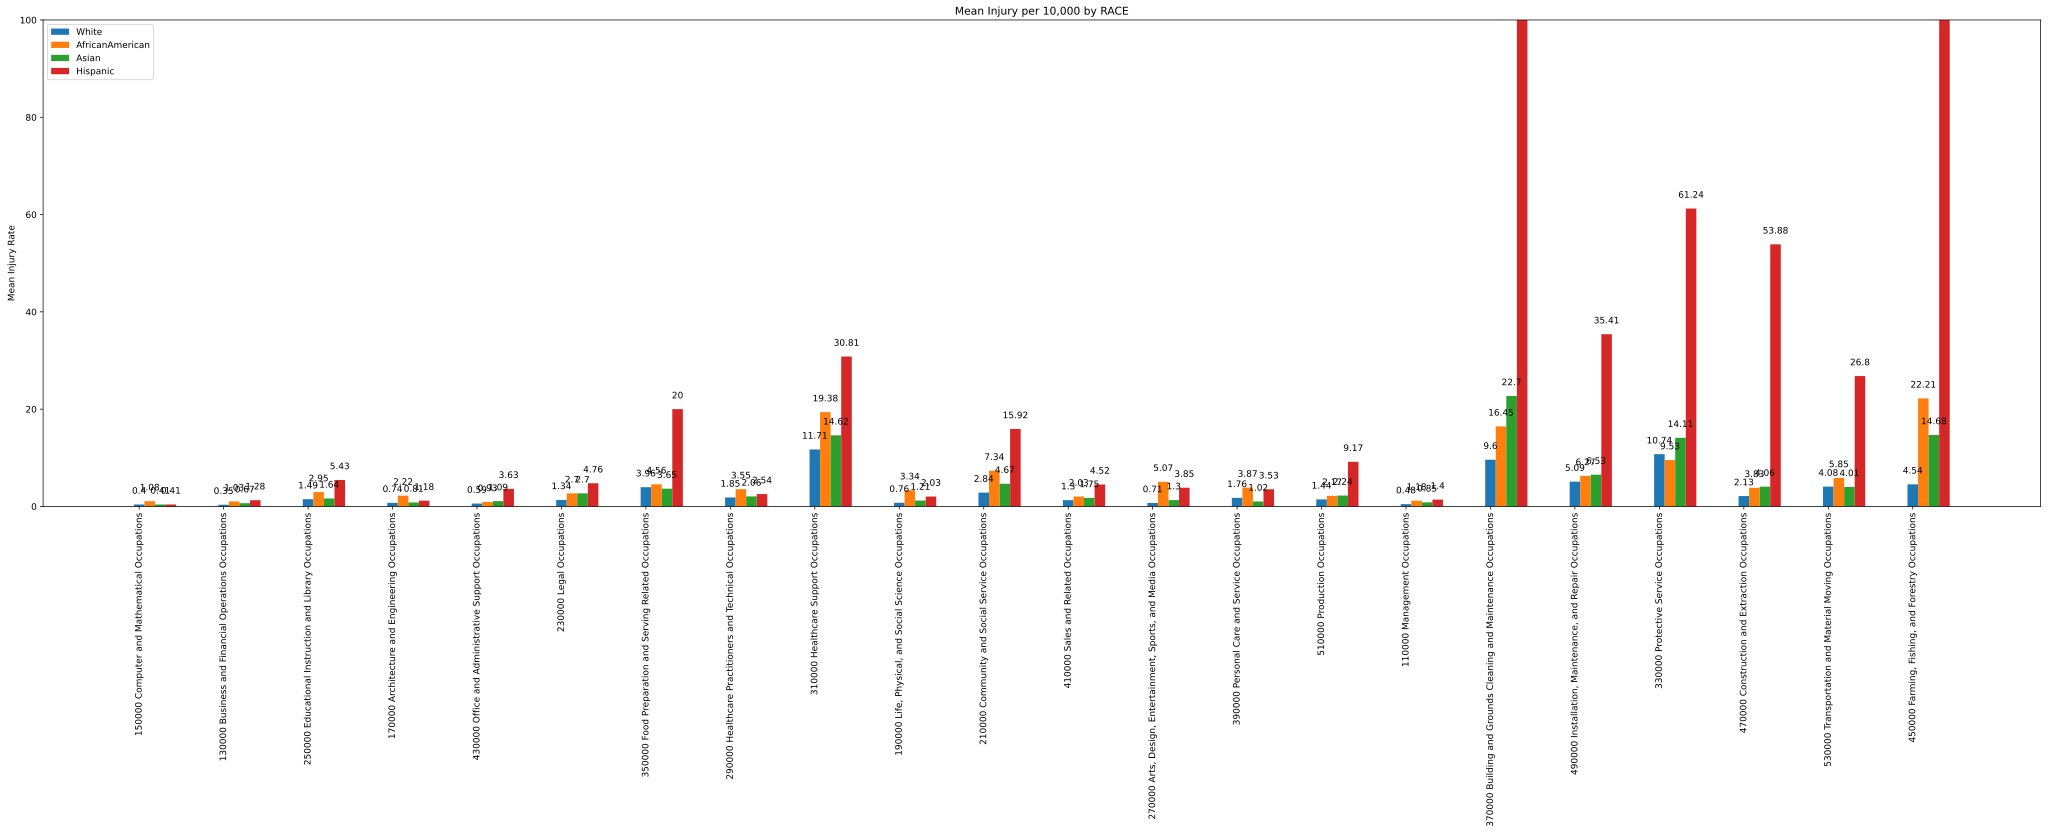

In [42]:
           
groups = len(mult_array)
grpd = []
grpl = []
for i in range(0,len(mult_array)):
    subgrp = []
    # Get value point by point
    for j in range(0,len(mult_array[i][1])):
        val = mult_array[i][1][j][1]
        
        val = round(10000*val,2)
        
        subgrp.append(val)

    #print(subgrp)
    grpl.append(mult_array[i][0])
    grpd.append(subgrp)
    
x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

rects = []

fig, ax = plt.subplots(figsize=(40, 10))

print(len(grpd))
print(len(grpd[0]))

for i in range(0,len(grpd)):
    tmp_rect = ax.bar(x+i*(width/2), grpd[i], width/2, label=grpl[i])
    rects.append(tmp_rect)
    
    
# Add bar for relative population size
#total_ocup = np.array(total_male) + np.array(total_female)
#pop_scaled = np.array(grpd).max() / total_ocup[0:-1].max() * total_ocup
#i=i+1
#tmp_rect = ax.bar(x+i*(width/2), pop_scaled[0:-1], width/2, label='Population')
#rects.append(tmp_rect)

    
title = "Mean Injury per 10,000 by RACE"
    
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Mean Injury Rate')
ax.set_title(title)
ax.set_xticks(x, labels, rotation=90)
ax.legend()

ax.set_ylim(0, 100)

for i in range(0,len(grpd)):
    ax.bar_label(rects[i], padding=10)

#fig.tight_layout() 
    
save_title = "../PLOTS/" + desired_file_output + title + ".png"
save_title = save_title.replace(",","")
save_title = save_title.replace(" ","_")
print(save_title)
plt.savefig(save_title, dpi=100, bbox_inches='tight')
    
plt.show()
#plt.close()

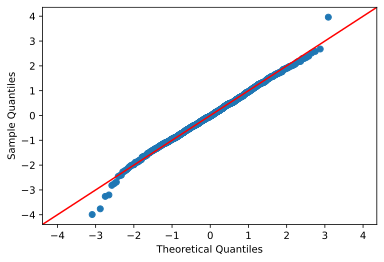

In [33]:
# Sample QQ plot

import statsmodels.api as sm
from scipy.stats import norm
import pylab

my_data = norm.rvs(size=1000)
sm.qqplot(my_data, line='45')
pylab.show()


In [34]:
# Restructure data for QQ analysis

[0.4, 0.35, 1.49, 0.74, 0.59, 1.34, 3.96, 1.85, 11.71, 0.76, 2.84, 1.3, 0.71, 1.76, 1.44, 0.48, 9.6, 5.09, 10.74, 2.13, 4.08, 4.54]
[1.08, 1.03, 2.95, 2.22, 0.93, 2.7, 4.56, 3.55, 19.38, 3.34, 7.34, 2.03, 5.07, 3.87, 2.17, 1.18, 16.45, 6.27, 9.53, 3.83, 5.85, 22.21]
[0.41, 0.67, 1.64, 0.81, 1.09, 2.7, 3.65, 2.06, 14.62, 1.21, 4.67, 1.75, 1.3, 1.02, 2.24, 0.85, 22.7, 6.53, 14.11, 4.06, 4.01, 14.68]
[0.41, 1.28, 5.43, 1.18, 3.63, 4.76, 20.0, 2.54, 30.81, 2.03, 15.92, 4.52, 3.85, 3.53, 9.17, 1.4, 151.5, 35.41, 61.24, 53.88, 26.8, 538.11]
22
0  150000 Computer and Mathematical Occupations
../PLOTS/./NF_SUBAVG_RACE/NF_R_2018_QQ_plot_150000.png


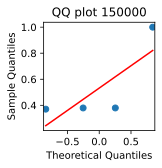

1  130000 Business and Financial Operations Occupations
../PLOTS/./NF_SUBAVG_RACE/NF_R_2018_QQ_plot_130000.png


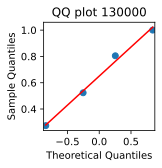

2  250000 Educational Instruction and Library Occupations
../PLOTS/./NF_SUBAVG_RACE/NF_R_2018_QQ_plot_250000.png


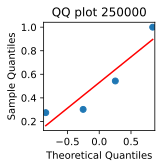

3  170000 Architecture and Engineering Occupations
../PLOTS/./NF_SUBAVG_RACE/NF_R_2018_QQ_plot_170000.png


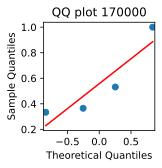

4  430000 Office and Administrative Support Occupations
../PLOTS/./NF_SUBAVG_RACE/NF_R_2018_QQ_plot_430000.png


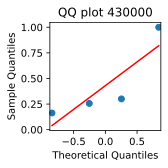

5  230000 Legal Occupations
../PLOTS/./NF_SUBAVG_RACE/NF_R_2018_QQ_plot_230000.png


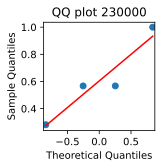

6  350000 Food Preparation and Serving Related Occupations
../PLOTS/./NF_SUBAVG_RACE/NF_R_2018_QQ_plot_350000.png


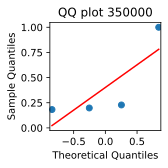

7  290000 Healthcare Practitioners and Technical Occupations
../PLOTS/./NF_SUBAVG_RACE/NF_R_2018_QQ_plot_290000.png


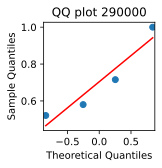

8  310000 Healthcare Support Occupations
../PLOTS/./NF_SUBAVG_RACE/NF_R_2018_QQ_plot_310000.png


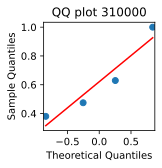

9  190000 Life, Physical, and Social Science Occupations
../PLOTS/./NF_SUBAVG_RACE/NF_R_2018_QQ_plot_190000.png


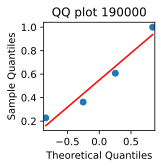

10  210000 Community and Social Service Occupations
../PLOTS/./NF_SUBAVG_RACE/NF_R_2018_QQ_plot_210000.png


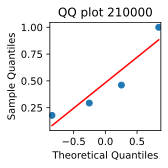

11  410000 Sales and Related Occupations
../PLOTS/./NF_SUBAVG_RACE/NF_R_2018_QQ_plot_410000.png


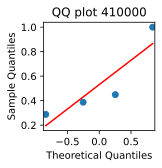

12  270000 Arts, Design, Entertainment, Sports, and Media Occupations
../PLOTS/./NF_SUBAVG_RACE/NF_R_2018_QQ_plot_270000.png


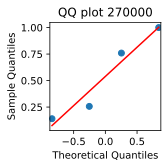

13  390000 Personal Care and Service Occupations
../PLOTS/./NF_SUBAVG_RACE/NF_R_2018_QQ_plot_390000.png


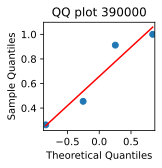

14  510000 Production Occupations
../PLOTS/./NF_SUBAVG_RACE/NF_R_2018_QQ_plot_510000.png


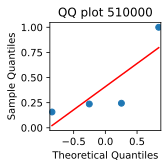

15  110000 Management Occupations
../PLOTS/./NF_SUBAVG_RACE/NF_R_2018_QQ_plot_110000.png


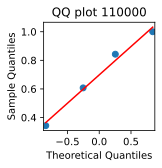

16  370000 Building and Grounds Cleaning and Maintenance Occupations
../PLOTS/./NF_SUBAVG_RACE/NF_R_2018_QQ_plot_370000.png


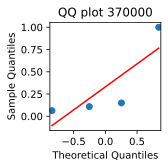

17  490000 Installation, Maintenance, and Repair Occupations
../PLOTS/./NF_SUBAVG_RACE/NF_R_2018_QQ_plot_490000.png


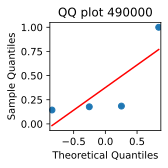

18  330000 Protective Service Occupations
../PLOTS/./NF_SUBAVG_RACE/NF_R_2018_QQ_plot_330000.png


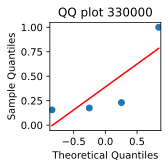

19  470000 Construction and Extraction Occupations
../PLOTS/./NF_SUBAVG_RACE/NF_R_2018_QQ_plot_470000.png


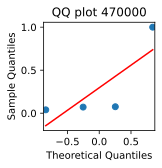

20  530000 Transportation and Material Moving Occupations
../PLOTS/./NF_SUBAVG_RACE/NF_R_2018_QQ_plot_530000.png


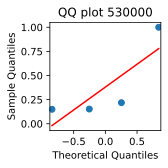

21  450000 Farming, Fishing, and Forestry Occupations
../PLOTS/./NF_SUBAVG_RACE/NF_R_2018_QQ_plot_450000.png


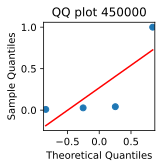

In [35]:
labels = []

for a in range(0,len(mult_array)):

    for i in range(0,len(mult_array[a][1])):
        line = mult_array[a][1][i]
        larr = str(line[0]).split(" ")
        lbl  = ""
        #print(larr)
        for j in range(0,len(larr[1:])):
            new_lbl = str(larr[1+j])
            lbl = lbl + " " + new_lbl
        #print(lbl)

        if lbl not in labels:
            labels.append(lbl)

groups = len(mult_array)
grpd = []
grpl = []
for i in range(0,len(mult_array)):
    subgrp = []
    # Get value point by point
    for j in range(0,len(mult_array[i][1])):
        val = mult_array[i][1][j][1]
        
        val = round(10000*val,2)
        
        subgrp.append(val)

    print(subgrp)
    grpl.append(mult_array[i][0])
    grpd.append(subgrp)
    
# Restructure
qq_data = []

print(len(grpd[1]))

for i in range(0,len(grpd[0])):
    tmp_list = []
    for j in range(0,len(grpd)):
        #print(grpd[j][i]," ",end="")
        tmp_list.append(grpd[j][i])
    #print(tmp_list)
    tmax = np.array(tmp_list).max()
    tscale = np.array(tmp_list) / tmax
    qq_data = qq_data + tscale.tolist()
    #print(tscale)
    
    #my_data = norm.rvs(size=22)
    my_data = tscale
    #print(my_data)
    fig, ax = plt.subplots(figsize=(2, 2))
    sm.qqplot(my_data, line='r', ax=ax)
    
    print(i,labels[i])
    
    title = "QQ plot "+str(labels[i]).split(" ")[1]
    ax.set_title(title)

    save_title = "../PLOTS/" + desired_file_output + title + ".png"
    save_title = save_title.replace(",","")
    save_title = save_title.replace(" ","_")
    print(save_title)
    plt.savefig(save_title, dpi=100, bbox_inches='tight')
    
    #pylab.show()
    plt.show()
    #plt.close()

In [36]:
print(labels)    
print(len(labels))    
for i in range(0,len(labels)):
    print(labels[i])

[' 150000 Computer and Mathematical Occupations', ' 130000 Business and Financial Operations Occupations', ' 250000 Educational Instruction and Library Occupations', ' 170000 Architecture and Engineering Occupations', ' 430000 Office and Administrative Support Occupations', ' 230000 Legal Occupations', ' 350000 Food Preparation and Serving Related Occupations', ' 290000 Healthcare Practitioners and Technical Occupations', ' 310000 Healthcare Support Occupations', ' 190000 Life, Physical, and Social Science Occupations', ' 210000 Community and Social Service Occupations', ' 410000 Sales and Related Occupations', ' 270000 Arts, Design, Entertainment, Sports, and Media Occupations', ' 390000 Personal Care and Service Occupations', ' 510000 Production Occupations', ' 110000 Management Occupations', ' 370000 Building and Grounds Cleaning and Maintenance Occupations', ' 490000 Installation, Maintenance, and Repair Occupations', ' 330000 Protective Service Occupations', ' 470000 Construction 